In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-detection-dataset


## Import Required Libraries

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Train YOLO Model

In [ ]:
data = {
    "train": "/kaggle/input/face-detection-dataset/images/train",
    "val": "/kaggle/input/face-detection-dataset/images/val",
    "nc": 1,
    "names": ["face"]
}


with open("data.yaml", "w") as f:  # Open file in write mode
    yaml.dump(data, f, default_flow_style=False)  # Write data to YAML

In [ ]:
Data_yaml = "data.yaml"

In [ ]:
model = YOLO("yolo11n.yaml").load("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 302MB/s]


Transferred 499/499 items from pretrained weights


In [ ]:
results = model.train(data=Data_yaml, epochs=10, imgsz=640, freeze=None)

Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=yolo11n.pt, prof

100%|██████████| 755k/755k [00:00<00:00, 57.4MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,035 parameters, 2,590,019 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.3 ms, read: 17.0±6.4 MB/s, size: 229.5 KB)


train: Scanning /kaggle/input/face-detection-dataset/labels/train... 13386 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13386/13386 [03:20<00:00, 66.76it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/face-detection-dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.2±0.4 ms, read: 38.2±24.6 MB/s, size: 308.9 KB)


val: Scanning /kaggle/input/face-detection-dataset/labels/val... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:50<00:00, 66.79it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/face-detection-dataset/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.23G      1.432      1.496      1.202         28        640: 100%|██████████| 837/837 [05:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]


                   all       3347      10299      0.846      0.635       0.73      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.26G      1.367     0.9676      1.185         56        640: 100%|██████████| 837/837 [04:50<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:38<00:00,  2.73it/s]


                   all       3347      10299      0.825      0.656      0.731       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.28G      1.338     0.8933      1.169         26        640: 100%|██████████| 837/837 [04:45<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:37<00:00,  2.81it/s]


                   all       3347      10299      0.841      0.653      0.744      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.28G      1.301     0.8374      1.152         28        640: 100%|██████████| 837/837 [04:47<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:38<00:00,  2.70it/s]


                   all       3347      10299      0.873      0.705      0.796        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.29G      1.262     0.7716      1.125         29        640: 100%|██████████| 837/837 [04:50<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:38<00:00,  2.70it/s]


                   all       3347      10299       0.88      0.727      0.817      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.31G      1.241     0.7429      1.115         19        640: 100%|██████████| 837/837 [04:55<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:38<00:00,  2.72it/s]


                   all       3347      10299      0.877       0.75       0.83      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.33G      1.216     0.7079      1.099         33        640: 100%|██████████| 837/837 [04:49<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:38<00:00,  2.75it/s]


                   all       3347      10299      0.887      0.753      0.838      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.34G      1.191     0.6693      1.088         29        640: 100%|██████████| 837/837 [04:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:37<00:00,  2.77it/s]


                   all       3347      10299      0.881      0.774      0.848      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.35G      1.176     0.6433      1.076         41        640: 100%|██████████| 837/837 [04:47<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:38<00:00,  2.74it/s]


                   all       3347      10299      0.893      0.773      0.857      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.37G      1.153     0.6136      1.059         17        640: 100%|██████████| 837/837 [04:47<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:38<00:00,  2.75it/s]


                   all       3347      10299       0.89      0.783       0.86       0.57

10 epochs completed in 0.916 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:40<00:00,  2.61it/s]


                   all       3347      10299       0.89      0.782       0.86       0.57
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


## Validate Model

In [ ]:
metrics = model.val()

## Export model for future use

In [ ]:
# Save full model
torch.save(model.model, "face.pt")


image 1/1 /kaggle/input/face-detection-dataset/images/val/6e831b2533328828.jpg: 576x640 1 face, 11.1ms
Speed: 3.3ms preprocess, 11.1ms inference, 2.8ms postprocess per image at shape (1, 3, 576, 640)


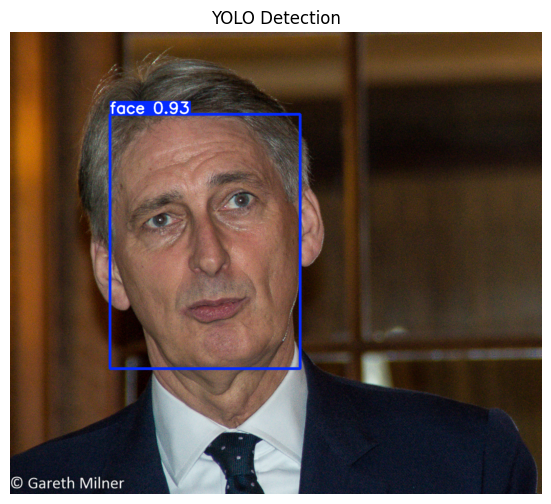

In [ ]:
# Ensure OpenCV and Matplotlib are installed
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained model
lmodel = YOLO("face.pt")  # Already loaded earlier, shown again for clarity

# Path to a validation image
val_img_dir = os.path.join(path, "images", "val")
val_image_name = os.listdir(val_img_dir)[0]  # First image in val
val_image_path = os.path.join(val_img_dir, val_image_name)

# Run inference
results = lmodel(val_image_path)

# Display the image with bounding boxes
# Ultralytics' result object provides a .plot() method for visualization
for r in results:
    # Get image with bounding boxes
    img_with_boxes = r.plot()  # returns a numpy array (BGR)

    # Convert to RGB for matplotlib
    img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

    # Plot the result
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("YOLO Detection")
    plt.show()